<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



Esta es una notebook autocontenida para el análisis de datos de la tabla de características de las carpetas de las imágenes del repositorio [Deuba](https://gitlab.com/ciiiutnfrc/deuba) propuesto para la mentoría *'Detección de objetos en imágenes'*.

Para detalles como se encontró la tabla que vamos a utilizar, revisen la notebook [0_DetecciónObjetos_ArmandoLaTabla.ipynb](0_DetecciónObjetos_ArmandoLaTabla.ipynb)


Integrantes


* Carignano, Hugo
* Diaz, Federico
* Villafañe, Roxana N. 


<a name="exploratory_data_analysis"></a>
## **Consignas para la materia Aprendisaje No Supervisado**

### 1 General 
*FECHA LíMITE DE ENTREGA: 02/10*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia "Aprendisaje No Supervisado". El mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles acciones a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje No Supervisado

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

#### 2.1 Exploración de Clustering con dos variables: 

visualizar variables de a pares de las columnas de 0 a 14 (por ejemplo: area, color de los canales, posición) con las mas representativas de las variables que hayan encontrado en las entregas anteriores. 
Colorear por clasificación binaria de acuerdo a las etiquetas.

#### 2.2 Algoritmos de Clústering:
Con los pares de variables del punto anterior que crea adeacuado probar: 
 * Kmeans: Probar con diferentes cantidades de grupos por mas que sean 2 las clases conocidas. 
 * Mean Shift: Estimar el número de clústers de nuestros datos.
 
 
Utilizar los métodos del codo y de siluetas para determinar el número óptimo de clústers.

Comparar los números de clúster entre métodos.

También probar: 
 * DBSCAN: Estimar la cantidad de clústers. Probar diferentes parámetros. 
 * Clustering Jerárquicos: comparar los diferentes tipos de linkage: single, average, complete y ward.
 
* Comparar las etiquetas obtenidas y las del dataset utilizando las métricas de sklearn: Homogeneity, Completeness, V-measure, Adjusted Rand Index, Adjusted Mutual Information, Silhouette Coefficient...
Realizar una tabla con los resultados obtenidos. 


  * ¿Se corresponden las clases que sabemos que hay, con los clústers que encontraron? 

  * ¿Se puede hacer clusters por color predominante en las imágenes?
 

#### 2.3 Visualizacion con embeddings: 

Para obtener las columnas [0-2047] de nuestro dataSet utilizamos la salida de una red neuronal aplicada a imágenes. Esta red nos devuelvió un vector en un espacio determinado que representa la imagen. ["Extract a feature vector for any image with PyTorch"](https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c?gi=e61c2b015d24).

Como vieron en clase con esta transformación perdemos interpretabilidad de dichas características. 

##### 2.3.1 t-SNE

Explorar opciones para transformar el espacio de dim 2048 en un espacio de dimensión 2 o 3. 

Revisar este [link](https://distill.pub/2016/misread-tsne/) para identificar como influyen los parámetros.

En en el espacio *tSNE*, cuántos clústers encuentran con *Kmeans* y *Mean Shift*?

Pueden visualizar las clases que sabemos que existen sobre los clústers? 

##### 2.3.2 PCA
Retomar la aplicación de PCA de las entregas anteriores y aplicar *Kmeans* y *Mean Shift*. 

Que conclusiones se pueden obtener? 

Comparar ambas transformaciones. 

#### 2.4 Clasificación semisupervisada

Aprovechando que tenemos imágenes, elegir y explorar las mismas y seleccionar un par donde figuren caras con el rostro descubierto y otros con caras con diferentes tipos de barbijos. 
La idea es realizar una segmentación de la imágen para determinar lo que sería un barbijo o una cara o parte de la misma. 

Revisar la  notebook ['ntb3_self_learning.ipynb'](https://github.com/DiploDatos/AprendizajeNOSupervisado/blob/master/2021/ntb3_self_learning.ipynb) 

Entrenar un modelo k-Nearest Neighbor con los pixeles que etiquetaron.


Recordar de documentar los pasos que están llevando a cabo, comentar el código, plantear inconvenientes y contar lo que encontraron, poner conclusiones :).

### 3 Corriendo la Notebook



In [1]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path
import os


import seaborn as sns
from google.colab.patches import cv2_imshow
import matplotlib.patches as mpatches
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import ParameterGrid

In [3]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import plotly.express as px

# Aprendizaje semi-supervisado (Semi-supervised learning) 

### Self-learning


En este caso, se entrena un modelo con datos etiquetados y se utiliza para predecir pseudo-etiquetas para los datos no etiquetados. Luego, el modelo se entrena en ambas etiquetas de verdad básica y pseudo-etiquetas simultáneamente.

En este notebook abordamos el problema de **segmentación en una imagen**, esto es clasificar dentro de la misma imagen, es decir, asignar un label a cada pixel que conforma la misma.

Para ello, asignamos un label, mediante los ROI o regiones de interés en la imagen. Es decir, que solo vamos a etiquetar una parte de la imagen y luego mediante un modelo de ML, en este caso, KNN (vecinos mas cercanos), vamos a hacer una predicción sobre esas regiones de la imagen que todavia no tienen etiquetas. 





En primer lugar leemos la imagen correspondiente, en este caso, podria ser una imagen con barbijo y otra sin barbijo. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.chdir('/content/drive/My Drive/Mentoria-imagenes/dataset/all-frames_train/')

Damos acceso a una imagen cualquiera

In [6]:
picture =  'video4-frame-000584.jpg'
img=cv2.imread(picture)

In [7]:
print("El tipo de la primer imagen es ",type(img))
print("El tipo de cada píxel es ",type(img[0,0,0]))
print("La dimensión de la imagen es ",img.shape)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (1080, 1920, 3)


In [8]:
altura=img.shape[0]
ancho=img.shape[1]
canales=img.shape[2]
print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

La altura es 1080 .El ancho es  1920 .Los canales de color son  3


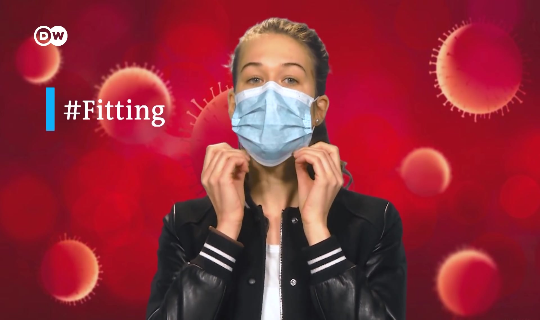

In [9]:
imagen = cv2.resize(img, (int(altura/2), int(ancho/6))) #se hizo resize para mejor visualización! 
cv2_imshow(imagen)

In [10]:
dims=img.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=img[f,c,:]
        
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()

Tamaño de Base de pixeles: (2073600, 4)


pixel_id  rojo  verde  azul
0         0    34     21    89
1         1    34     21    89
2         2    34     21    89
3         3    34     21    89
4         4    32     21    89

In [11]:
n_clust = 3
df_km = pd.DataFrame(data0[:,1:4], columns=["rojo","verde","azul"])

km = KMeans(n_clusters=n_clust)
km.fit(df_km) #utiliza 3 dimensiones 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  4257525334.4571877


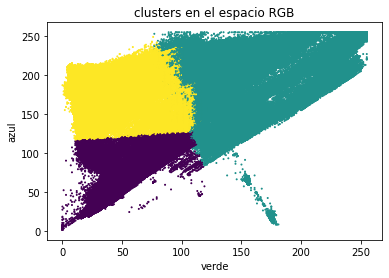

In [12]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c=clusters, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title('clusters en el espacio RGB')
plt.show()

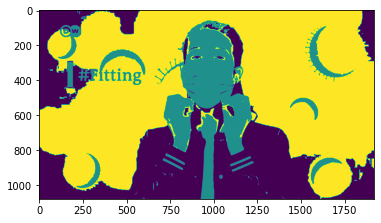

In [13]:
img_clusters=km.labels_.reshape(cant_filas,cant_columnas)
plt.imshow(img_clusters)
#plt.colorbar()
plt.show()

En la imagen podemos distinguir claramente la piel de la muchacha del fondo, pero el barbijo se pierde dentro del rostro. Probemos ahora con hacer una segmentación pero de las imágenes recortadas. 

In [14]:
os.chdir('/content/drive/My Drive/Mentoria-imagenes/dataset/crop/dataSet_train_cropp')

### Veamos una imagen CON BARBIJO 



---



In [15]:
picture =  'Video1-frame-000114_single_box_0.jpg'
img=cv2.imread(picture)

In [16]:
print("El tipo de la primer imagen es ",type(img))
print("El tipo de cada píxel es ",type(img[0,0,0]))
print("La dimensión de la imagen es ",img.shape)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (57, 55, 3)


In [17]:
altura=img.shape[0]
ancho=img.shape[1]
canales=img.shape[2]
print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

La altura es 57 .El ancho es  55 .Los canales de color son  3


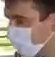

In [18]:
cv2_imshow(img)

Creamos un set de datos a partir de los pixeles en la imagen

In [19]:
dims=img.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=img[f,c,:]
        
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()

Tamaño de Base de pixeles: (3135, 4)


pixel_id  rojo  verde  azul
0         0   219    224   227
1         1   168    173   176
2         2   150    154   159
3         3   134    137   145
4         4   134    136   146

KMeans Clustering

In [20]:
n_clust = 3
df_km = pd.DataFrame(data0[:,1:4], columns=["rojo","verde","azul"])

km = KMeans(n_clusters=n_clust)
km.fit(df_km) #utiliza 3 dimensiones 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  5203007.584975006


Clusters

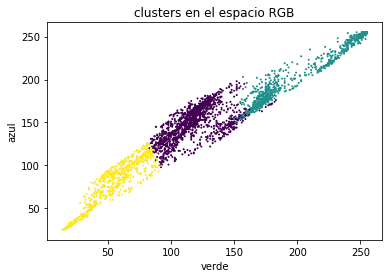

In [21]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c=clusters, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title('clusters en el espacio RGB')
plt.show()

Vemos en el gráfico que el espacio RGB se puede diferenciar a simple vista los 3 clusteres correspondientes a los canales RGB

### Segmentamos la imagen

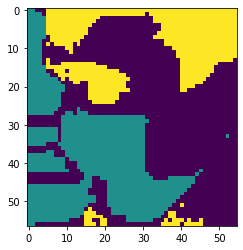

In [22]:
img_clusters=km.labels_.reshape(cant_filas,cant_columnas)
plt.imshow(img_clusters)
#plt.colorbar()
plt.show()

Vemos que se confunde el barbijo con el fondo en esta imagen. 

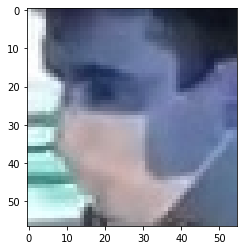

In [23]:
plt.imshow(img)
plt.show()

#### Se eligen los ROI o regiones de interés

In [24]:
#roi=(columna, fila, anchocol, anchofila))
roi1=(23, 35, 7, 15)#barbijo
roi2=(15, 5, 5, 5) #rostro
roi3=(2, 40, 5, 10)#fondo
print('En cada ROI se guarda: (columna, fila, anchocol, anchofila)')

En cada ROI se guarda: (columna, fila, anchocol, anchofila)


In [25]:
rois=[roi1,roi2,roi3]

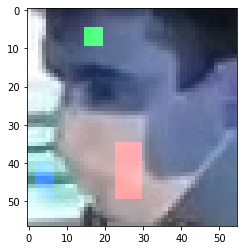

Rosa: suelo, Verde: pasto, Celeste: fondo


In [26]:
img_rois=img.copy()

for i in range(3):
  roi=rois[i]
  f1=roi[1]
  ff=roi[1]+roi[3]
  c1=roi[0]
  cf=roi[0]+roi[2]
  img_rois[f1:ff,c1:cf,i]=255

plt.imshow(img_rois)
plt.show()
print('Rosa: suelo, Verde: pasto, Celeste: fondo')

In [27]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=img[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()



180
(180, 5)
Base de pixeles etiquetados:


pixel_id  rojo  verde  azul  etiqueta
0      1948   194    176   177         1
1      1949   193    176   179         1
2      1950   188    175   177         1
3      1951   184    174   180         1
4      1952   182    174   184         1

Graficamos

cantidad de muestras etiquetadas: 180
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


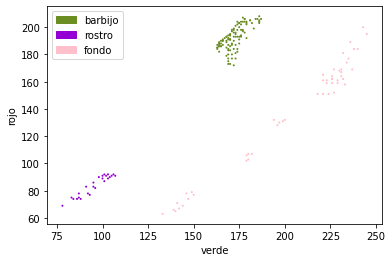

In [28]:
colores=['olivedrab','darkviolet','pink']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='barbijo')
patch2 = mpatches.Patch(color=colores[1], label='rostro')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

En espacio 3D

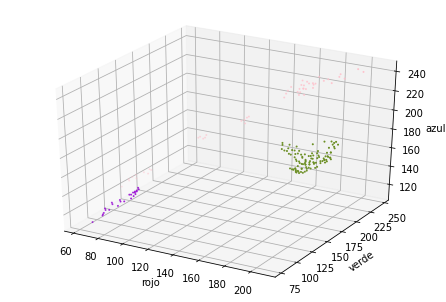

In [29]:
fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0   219    224   227         0
1         1   168    173   176         0
2         2   150    154   159         0
3         3   134    137   145         0
4         4   134    136   146         0
2955
3135
proporción de datos etiqueados: 0.05741626794258373


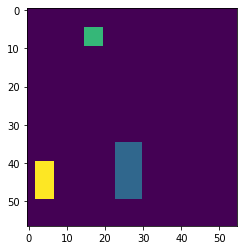

In [30]:
#Base completa con etiquetas y no etiquetados en 0
a=img.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

KNN o vecinos mas cercanos

In [31]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 1.00


La segmentación de la imagen

(57, 55, 3)
[2]


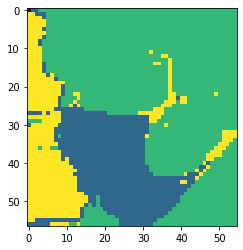

In [32]:
a=img.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([img[i,j,:]])        
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)
plt.show()

In [33]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)


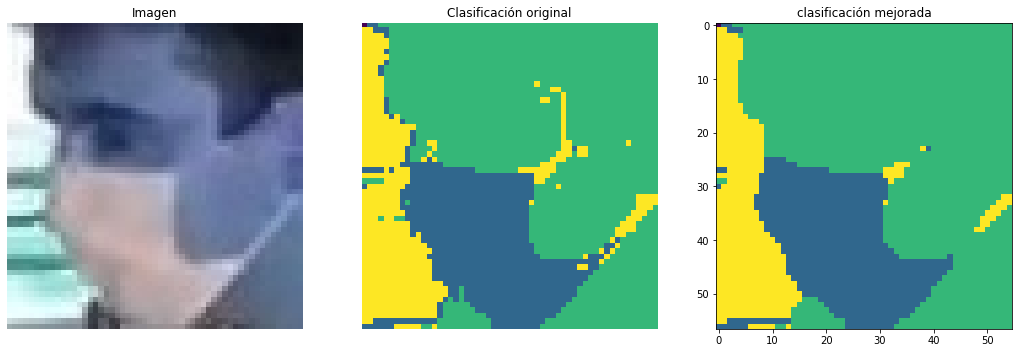

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(img)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

### Veamos una imagen SIN BARBIJO 



---

En esta instancia seguimos los mismos pasos, pero con otra imagen, en este caso, sin barbijo. 





In [35]:
picture =  'Video1-frame-000075_single_box_0.jpg'
img2=cv2.imread(picture)

In [36]:
print("El tipo de la primer imagen es ",type(img2))
print("El tipo de cada píxel es ",type(img2[0,0,0]))
print("La dimensión de la imagen es ",img2.shape)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (79, 73, 3)


In [37]:
altura=img2.shape[0]
ancho=img2.shape[1]
canales=img2.shape[2]
print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

La altura es 79 .El ancho es  73 .Los canales de color son  3


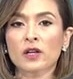

In [38]:
cv2_imshow(img2)

In [39]:
dims=img2.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=img2[f,c,:]
        
df2 = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df2.shape)
df2.head()

Tamaño de Base de pixeles: (5767, 4)


pixel_id  rojo  verde  azul
0         0   119    124   127
1         1    98    103   106
2         2    73     75    83
3         3    73     75    83
4         4    75     75    87

In [40]:
n_clust = 3
df_km = pd.DataFrame(data0[:,1:4], columns=["rojo","verde","azul"])

km = KMeans(n_clusters=n_clust)
km.fit(df_km) #utiliza 3 dimensiones 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  8543498.558819432


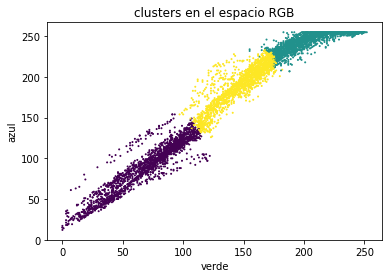

In [41]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df2[variable1].values
f2 = df2[variable2].values

plt.scatter(f1, f2,c=clusters, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title('clusters en el espacio RGB')
plt.show()

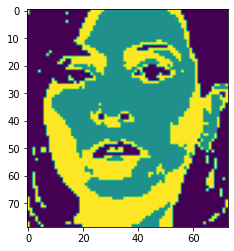

In [42]:
img_clusters=km.labels_.reshape(cant_filas,cant_columnas)
plt.imshow(img_clusters)
#plt.colorbar()
plt.show()

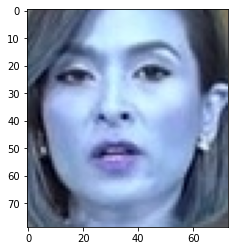

In [43]:
plt.imshow(img2)
plt.show()

In [44]:
#roi=(columna, fila, anchocol, anchofila))
roi1=(25, 1, 10, 10)#rostro
roi2=(20, 30, 20, 10) #rostro
roi3=(61, 5, 5, 10)#fondo
print('En cada ROI se guarda: (columna, fila, anchocol, anchofila)')

En cada ROI se guarda: (columna, fila, anchocol, anchofila)


In [45]:
rois=[roi1, roi2,roi3]

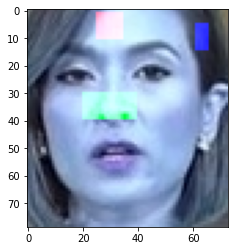

Rosa: rostro, Verde: rostro, Celeste: fondo


In [46]:
img_rois=img2.copy()

for i in range(3):
  roi=rois[i]
  f1=roi[1]
  ff=roi[1]+roi[3]
  c1=roi[0]
  cf=roi[0]+roi[2]
  img_rois[f1:ff,c1:cf,i]=255

plt.imshow(img_rois)
plt.show()
print('Rosa: rostro, Verde: rostro, Celeste: fondo')

In [47]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=img2[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()


350
(350, 5)
Base de pixeles etiquetados:


pixel_id  rojo  verde  azul  etiqueta
0        98   123    141   188         1
1        99   140    158   205         1
2       100   161    182   227         1
3       101   182    204   245         1
4       102   195    219   255         1

cantidad de muestras etiquetadas: 350
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


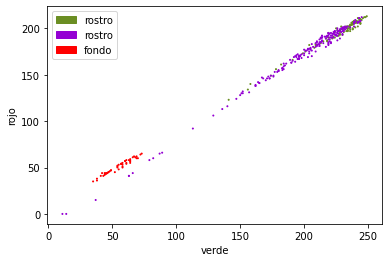

In [48]:
colores=['olivedrab','darkviolet','red']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='rostro')
patch2 = mpatches.Patch(color=colores[1], label='rostro')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

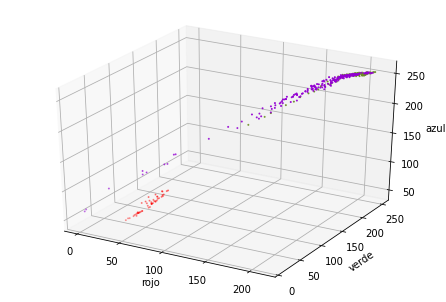

In [49]:
fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0   119    124   127         0
1         1    98    103   106         0
2         2    73     75    83         0
3         3    73     75    83         0
4         4    75     75    87         0
5417
5767
proporción de datos etiqueados: 0.06069013351829374


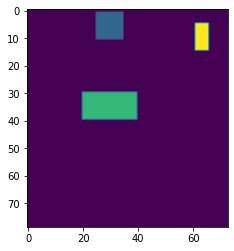

In [50]:
#Base completa con etiquetas y no etiquetados en 0
a=img2.shape
df_completo=df2.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

In [55]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.85


(79, 73, 3)
[3]


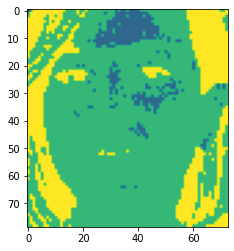

In [56]:
a=img2.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([img2[i,j,:]])        
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)
plt.show()

In [57]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)


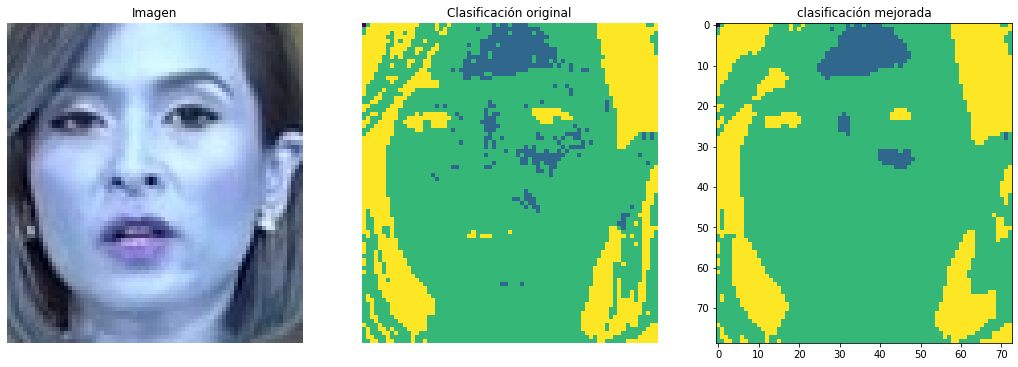

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(img2)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

### **Conclusión**


Despues de segmentar dos imágenes CON Y SIN BARBIJO, notamos que es mas dificil lograr una buena segmentación de una cara descubierta, antes de hacerlo con una imagen con barbijo. 

Los malos resultados pueden deberse a:

* el algoritmo puede fallar y no converger a los aglomerados
* las características consideradas no son suficientes o no son las adecuadas, por ejemplo.
